<h1 style="color:orange">EXERCISE CLASS 3 (Part 1/3)</h1>

# Modeling Process Data

### Chapter 3, Alwan

# Assumptions and remedy in case of violations


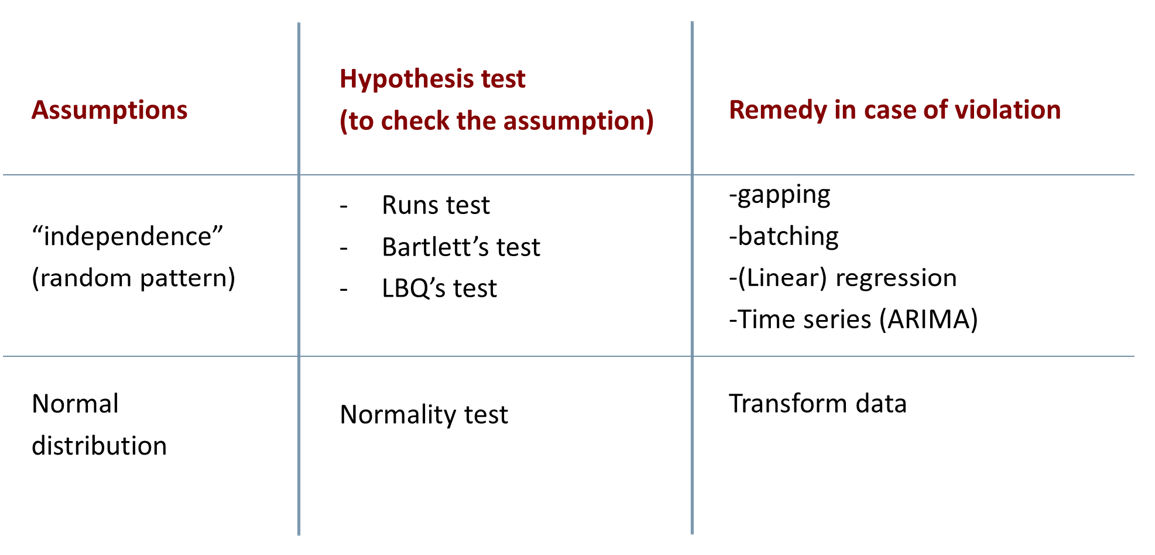


# EXERCISE 1
The weekly sales (thousands of dollars) of an e-commerce company are listed in the csv file 'dataset_ese3_es1.csv'.

1. Determine the value of 𝑛 and 𝑚 in observed runs
2. Assuming that the runs distribution is random, which is the expected number of runs?
3. Assuming that the underlying process is random, compute the 95% confidence interval for the number of runs, given 𝑚 and 𝑛 determined in point a)
4. Test the null hypothesis of observation randomness (significance level 5%)


## Point 1
Determine the value of 𝑛 and 𝑚 in observed runs.

> ### Solution
> 𝑛 is the total number of points 
>
> 𝑚 is the number of points above the mean

In [14]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Import the dataset
data = pd.read_csv('dataset_ese3_es1.csv')

data.head()

,Ex1
0,61.6361
1,62.9236
2,66.7807
3,64.7094
4,64.6682


Number of points n = 30
Mean = 71.38


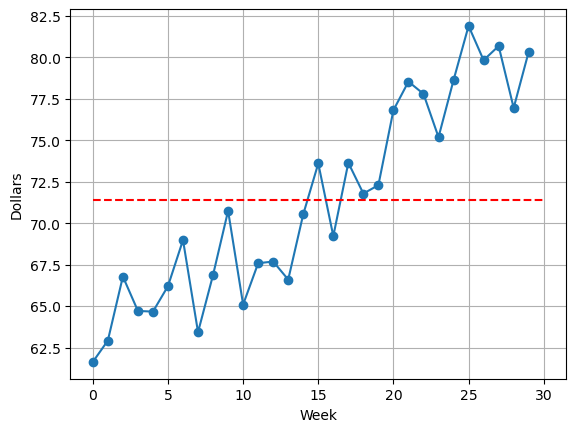

In [15]:
n=len(data)
print("Number of points n = %d" % n) #number of points


mean = data.mean()
print('Mean = %.2f'% mean) #mean of the points

# Let's plot the data first
plt.plot(data, 'o-')
plt.hlines(mean, 0, n, colors='r', linestyles='dashed')
plt.xlabel('Week')
plt.ylabel('Dollars')

plt.grid()
plt.show()


In [16]:
# Get the number of points above the mean
m = np.sum(data > mean).values[0]

print('Number of points above the mean, m = %d' % m) 

Number of points above the mean, m = 14


In [17]:
# Compute the number of runs
new_series = np.array(data - mean).flatten()

# Count how many times the sign changes
runs = (np.sum(np.diff(np.sign(new_series)) != 0) + 1)
print('Number of runs runs = %d' % runs) #number of runs

Number of runs runs = 4


## Point 2

Assuming that the runs distribution is random, which is the expected number of runs?

> ### Solution
> The expected number of runs, $Y$, is given by the formula:
>
> $$E(Y) =  \frac{2 m (n-m)}{n} +1 $$
>
> $n$ is the number of observations
>
> $m$ is the number of + 


In [18]:

#Expected number of runs
exp_runs= 2*m*(n-m)/n +1
print('Expected number of runs = %f' % exp_runs)


Expected number of runs = 15.933333


### Point 3
Assuming that the underlying process is random, compute the 95% confidence interval for the number of runs, given 𝑚 and 𝑛 determined in point 1. 

> ### Solution
> Standard deviation of $Y$:
> $$ \sqrt{V(Y)} = \sqrt\frac{2m(n-m)[2m(n-m)-n]}{ n^2 (n-1)} $$
> Normal approximation of a Poisson distribution:
> $$ Y \sim N(E(Y), V(Y)) $$
>
> Confidence interval: 
> $$E(Y) \pm z_{\alpha/2} \sqrt{V(Y)}$$


In [19]:
# Standard deviation of the number of runs
std_runs = np.sqrt((2*m*(n-m)*(2*m*(n-m)-n)/((n**2)*(n-1))))
print('Standard deviation of runs = %.03f' % std_runs)

#95% confidence interval
conf_int= stats.norm.interval(0.95, loc=exp_runs, scale=std_runs)
print('Confidence interval: (%.3f, %.3f)' % (conf_int[0], conf_int[1]))

Standard deviation of runs = 2.679
Confidence interval: (10.683, 21.183)


### Point 4
Test the null hypothesis of observation randomness (significance level 5%)

> Null hypothesis: process is random
> Alternative hypothesis: process is NOT random
>
> $ Z_{0} = \frac{Y-E(Y)}{\sqrt{V(Y)}}$
>
> Rejection region:
> $ |Z_{0}| > z_{\alpha/2} $

In [20]:
# Input data
alpha = 0.05 # significance level
#test statistic
z0 = (runs-exp_runs)/std_runs
print('z0 = %f' % z0)
z_alfa2= stats.norm.ppf(1-alpha/2)
print('z_alfa2 = %f' % z_alfa2)

if abs(z0)>z_alfa2:
  print('The null hypothesis is rejected')
else: 
  print('The null hypothesis is accepted')

z0 = -4.455074
z_alfa2 = 1.959964
The null hypothesis is rejected


> Compute the p-value.

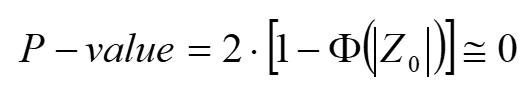

In [21]:
# Remember, it is a two-tailed test, so we need to multiply the p-value by 2
p_value = 2 * (1 - stats.norm.cdf(abs(z0)))
print('p-value = %.3f' % p_value)

p-value = 0.000


> Alternatively, you can use the `runstest_1samp` function directly to compute the test statistic and the associated p-value. 

In [22]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat, pval_runs = runstest_1samp(data['Ex1'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat))
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test statistic = -4.455
Runs test p-value = 0.000


## Random data generation

> Let's generate a sequence of random data from the specified distributions.

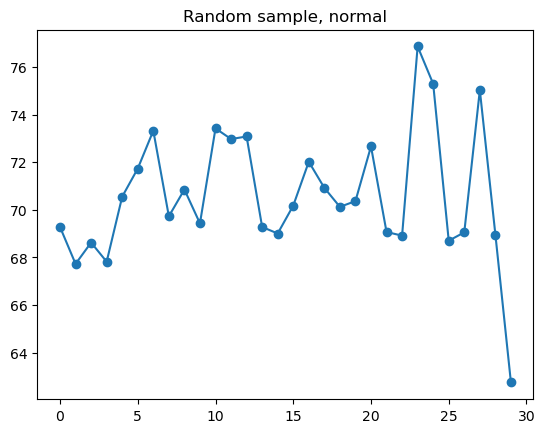

In [23]:
#generate random data
data_rand_norm = np.random.normal(loc=mean, scale=std_runs, size=n)
plt.plot(data_rand_norm, 'o-')
plt.title('Random sample, normal')
plt.show()

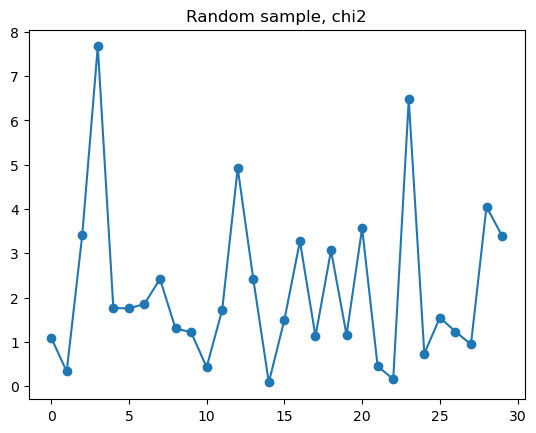

In [24]:

data_rand_chi2 = np.random.chisquare(df=2, size=n)
plt.plot(data_rand_chi2, 'o-')
plt.title('Random sample, chi2')
plt.show()

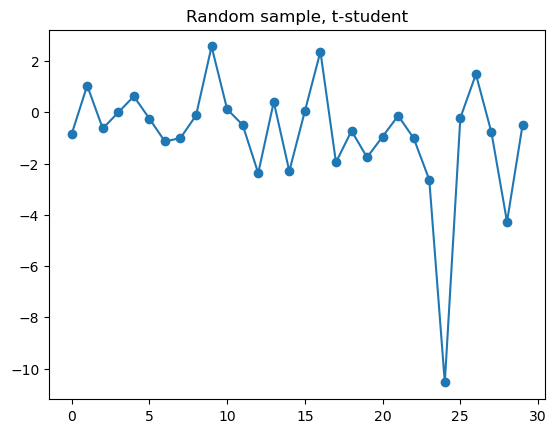

In [25]:

data_rand_t= np.random.standard_t(df=2, size=n)
plt.plot(data_rand_t, 'o-')
plt.title('Random sample, t-student')
plt.show()
